<a href="https://colab.research.google.com/github/CarlTeapot/Walmart-Recruiting/blob/main/model_experiment_PatchTST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install mlflow==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existi

In [22]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/ML PROEQTI/clean_train_data.csv')

display(train_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Month,Year,Week,Holiday_in_1_week_lag,Weeks_until_next_holiday
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,...,NaN,NaN,211.096358,8.106,Winter,2,2010,5,1.0,1
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,...,NaN,NaN,211.242170,8.106,Winter,2,2010,6,0.0,30
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,...,NaN,NaN,211.289143,8.106,Winter,2,2010,7,0.0,29
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,...,NaN,NaN,211.319643,8.106,Winter,2,2010,8,0.0,28
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,...,NaN,NaN,211.350143,8.106,Spring,3,2010,9,0.0,27


In [23]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [24]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
import wandb
import matplotlib.pyplot as plt
import joblib

NameError: name 'sample_ts' is not defined

<Figure size 1000x500 with 0 Axes>

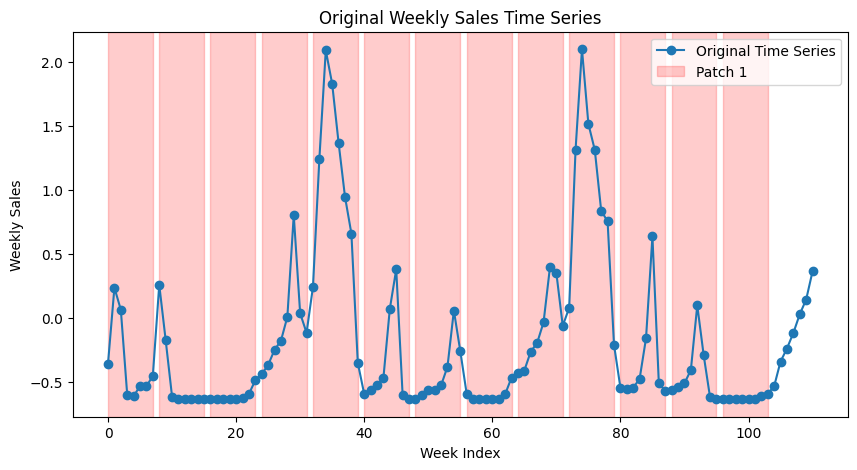

In [42]:
# Select a sample time series
sample_ts = train_df[(train_df['Store'] == 1) & (train_df['Dept'] == 16)]['Weekly_Sales'].values

# Define patch parameters from the best model
patch_len = 8
stride = 8

# Original Time Series
plt.figure(figsize=(10, 5))
plt.plot(range(len(sample_ts)), sample_ts, label='Original Time Series', marker='o')
plt.title('Original Weekly Sales Time Series')
plt.xlabel('Week Index')
plt.ylabel('Weekly Sales')

# Show Patches
for i in range(0, len(sample_ts) - patch_len + 1, stride):
    plt.axvspan(i, i + patch_len - 1, color='red', alpha=0.2, label=f'Patch {i//stride + 1}' if i == 0 else "")

plt.legend()
plt.show()

In [25]:
print(train_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Season', 'Month',
       'Year', 'Week', 'Holiday_in_1_week_lag', 'Weeks_until_next_holiday'],
      dtype='object')


In [26]:
# Check for NaN values
if train_df.isna().any().any():
    train_df = train_df.fillna(0)

In [27]:
# Sample 10% of store-dept pairs for faster training
sample_groups = train_df.groupby(['Store', 'Dept']).size().reset_index().sample(frac=0.1, random_state=42)
train_df = train_df.merge(sample_groups[['Store', 'Dept']], on=['Store', 'Dept'])

In [28]:
display(train_df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Season,Month,Year,Week,Holiday_in_1_week_lag,Weeks_until_next_holiday
0,1,16,2010-02-05,10217.55,0,A,151315,42.31,2.572,0.0,...,0.0,0.0,211.096358,8.106,Winter,2,2010,5,1.0,1
1,1,16,2010-02-12,11873.89,1,A,151315,38.51,2.548,0.0,...,0.0,0.0,211.242170,8.106,Winter,2,2010,6,0.0,30
2,1,16,2010-02-19,13855.54,0,A,151315,39.93,2.514,0.0,...,0.0,0.0,211.289143,8.106,Winter,2,2010,7,0.0,29
3,1,16,2010-02-26,12881.02,0,A,151315,46.63,2.561,0.0,...,0.0,0.0,211.319643,8.106,Winter,2,2010,8,0.0,28
4,1,16,2010-03-05,17129.81,0,A,151315,46.50,2.625,0.0,...,0.0,0.0,211.350143,8.106,Spring,3,2010,9,0.0,27


In [36]:
import wandb
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# W&B Grid Search setup
sweep_config = {
    'method': 'grid',
    'name': 'patchtst_grid_search',
    'metric': {'goal': 'minimize', 'name': 'val_wmae'},
    'parameters': {
        'seq_len': {'values': [26]},  # Fixed for now
        'pred_len': {'values': [1]},
        'patch_len': {'values': [4, 8, 12]},  # Reduced from 16 to limit combinations
        'stride': {'values': [4, 8, 12]},
        'd_model': {'values': [32, 64]},      # Reduced from 128 for speed
        'learning_rate': {'values': [1e-4, 1e-3]},
        'n_layers': {'values': [1, 2]},
        'epochs': {'values': [10]}
    }
}

sweep_id = wandb.sweep(sweep_config, project='walmart-sales-forecasting')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Create sweep with ID: 2cqrtvqx
Sweep URL: https://wandb.ai/gtoro22-free-university-of-tbilisi-/walmart-sales-forecasting/sweeps/2cqrtvqx
Using device: cpu


In [30]:
# Preprocess
feature_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'Week',
                'Weeks_until_next_holiday', 'IsHoliday', 'Holiday_in_1_week_lag', 'Type', 'Season']
le_store = LabelEncoder()
le_dept = LabelEncoder()
le_type = LabelEncoder()
le_season = LabelEncoder()
train_df['Store'] = le_store.fit_transform(train_df['Store'])
train_df['Dept'] = le_dept.fit_transform(train_df['Dept'])
train_df['Type'] = le_type.fit_transform(train_df['Type'])
train_df['Season'] = le_season.fit_transform(train_df['Season'])
joblib.dump(le_store, 'le_store.pkl')
joblib.dump(le_dept, 'le_dept.pkl')
joblib.dump(le_type, 'le_type.pkl')
joblib.dump(le_season, 'le_season.pkl')
num_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
            'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Year', 'Month', 'Week',
            'Weeks_until_next_holiday']
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
joblib.dump(scaler, 'scaler.pkl')
if np.any(np.isnan(train_df[num_cols].values)):
    print("Warning: NaN values after scaling")
    train_df[num_cols] = np.nan_to_num(train_df[num_cols].values, nan=0.0)

In [31]:
# Create sequences
def create_sequences(df, seq_len, pred_len, feature_cols, target_col):
    sequences = []
    targets = []
    is_holiday = []
    groups = df.groupby(['Store', 'Dept'])
    for (store, dept), group in groups:
        group = group.sort_values('Date')
        data = group[feature_cols].values
        target_data = group[target_col].values
        holiday_data = group['IsHoliday'].values
        for i in range(len(group) - seq_len - pred_len + 1):
            seq = data[i:i+seq_len]
            target = target_data[i+seq_len:i+seq_len+pred_len]
            holiday = holiday_data[i+seq_len:i+seq_len+pred_len]
            sequences.append(seq)
            targets.append(target)
            is_holiday.append(holiday)
    return np.array(sequences), np.array(targets), np.array(is_holiday)

In [37]:
# PatchTST model
class PatchTST(nn.Module):
    def __init__(self, c_in, seq_len, pred_len, n_layers, d_model, d_ff, patch_len, stride, n_heads=8):
        super(PatchTST, self).__init__()
        self.seq_len = seq_len
        self.pred_len = pred_len
        self.patch_len = patch_len
        self.stride = stride
        self.n_patches = (seq_len - patch_len) // stride + 1
        self.patch_embed = nn.Linear(patch_len * c_in, d_model)
        self.pos_embed = nn.Parameter(torch.randn(1, self.n_patches, d_model))
        encoder_layer = nn.TransformerEncoderLayer(d_model, n_heads, d_ff, dropout=0.1, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.output_layer = nn.Linear(d_model * self.n_patches, pred_len)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Parameter):
            nn.init.normal_(module, mean=0.0, std=0.02)

    def forward(self, x):
        batch_size = x.size(0)
        patches = x.unfold(1, self.patch_len, self.stride)
        patches = patches.permute(0, 1, 3, 2).reshape(batch_size, self.n_patches, -1)
        patches = self.patch_embed(patches) + self.pos_embed
        output = self.transformer(patches)
        output = output.reshape(batch_size, -1)
        output = self.output_layer(output)
        return output

# WMAE metric
def wmae(y_pred, y_true, is_holiday):
    weights = np.where(is_holiday, 5, 1)
    return np.sum(weights * np.abs(y_pred - y_true)) / np.sum(weights)

# Split for validation
val_size = int(0.2 * len(X))
train_idx = np.arange(len(X) - val_size)
val_idx = np.arange(len(X) - val_size, len(X))
X_train, y_train, is_holiday_train = X[train_idx], y[train_idx], is_holiday[train_idx]
X_val, y_val, is_holiday_val = X[val_idx], y[val_idx], is_holiday[val_idx]

# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=16)

# Training function
def train():
    wandb.init()  # Initializes config for each trial
    config = wandb.config

    # Initialize model
    model = PatchTST(c_in=len(feature_cols), seq_len=config.seq_len, pred_len=config.pred_len,
                     n_layers=config.n_layers, d_model=config.d_model, n_heads=8,
                     d_ff=config.d_model * 2, patch_len=config.patch_len, stride=config.stride)
    model = model.to(device)

    # Training loop
    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)
    for epoch in range(config.epochs):
        model.train()
        total_loss = 0
        nan_count = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            if torch.any(torch.isnan(outputs)):
                nan_count += 1
                continue
            loss = criterion(outputs, batch_y)
            if torch.isnan(loss):
                nan_count += 1
                continue
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            total_loss += loss.item()

        model.eval()
        val_wmae = 0
        with torch.no_grad():
            for i, (batch_X, batch_y) in enumerate(val_loader):
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X).cpu().numpy()
                batch_y = batch_y.cpu().numpy()
                batch_holiday = is_holiday_val[i * 16:(i + 1) * 16]
                if np.any(np.isnan(outputs)) or np.any(np.isnan(batch_y)):
                    nan_count += 1
                    continue
                val_wmae += wmae(outputs, batch_y, batch_holiday)

        avg_train_loss = total_loss / max(1, len(train_loader) - nan_count)
        avg_val_wmae = val_wmae / max(1, len(val_loader) - nan_count)
        wandb.log({'epoch': epoch + 1, 'train_loss': avg_train_loss, 'val_wmae': avg_val_wmae, 'nan_count': nan_count})
        print(f'Epoch {epoch+1}/{config.epochs}, Train Loss: {avg_train_loss:.4f}, Val WMAE: {avg_val_wmae:.4f}, NaN Count: {nan_count}')

    # Save model
    torch.save(model.state_dict(), f'patchtst_model_{wandb.run.id}.pth')
    wandb.save(f'patchtst_model_{wandb.run.id}.pth')

# Run sweep
wandb.agent(sweep_id, function=train, count=24)

wandb: Agent Starting Run: hdhcdd9n with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 4
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 4


Epoch 1/10, Train Loss: 0.4258, Val WMAE: 0.2174, NaN Count: 0
Epoch 2/10, Train Loss: 0.2743, Val WMAE: 0.1863, NaN Count: 0
Epoch 3/10, Train Loss: 0.2236, Val WMAE: 0.1756, NaN Count: 0
Epoch 4/10, Train Loss: 0.1931, Val WMAE: 0.1759, NaN Count: 0
Epoch 5/10, Train Loss: 0.1741, Val WMAE: 0.1617, NaN Count: 0
Epoch 6/10, Train Loss: 0.1614, Val WMAE: 0.1530, NaN Count: 0
Epoch 7/10, Train Loss: 0.1499, Val WMAE: 0.1533, NaN Count: 0
Epoch 8/10, Train Loss: 0.1432, Val WMAE: 0.1448, NaN Count: 0
Epoch 9/10, Train Loss: 0.1367, Val WMAE: 0.1489, NaN Count: 0
Epoch 10/10, Train Loss: 0.1320, Val WMAE: 0.1441, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▅▄▄▃▂▂▁▁▁
epoch,10
nan_count,0
train_loss,0.13204
val_wmae,0.14405


wandb: Agent Starting Run: cshve2p4 with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 4
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 8


Epoch 1/10, Train Loss: 0.4053, Val WMAE: 0.1956, NaN Count: 0
Epoch 2/10, Train Loss: 0.2515, Val WMAE: 0.1748, NaN Count: 0
Epoch 3/10, Train Loss: 0.2075, Val WMAE: 0.1764, NaN Count: 0
Epoch 4/10, Train Loss: 0.1837, Val WMAE: 0.1661, NaN Count: 0
Epoch 5/10, Train Loss: 0.1704, Val WMAE: 0.1573, NaN Count: 0
Epoch 6/10, Train Loss: 0.1605, Val WMAE: 0.1580, NaN Count: 0
Epoch 7/10, Train Loss: 0.1536, Val WMAE: 0.1573, NaN Count: 0
Epoch 8/10, Train Loss: 0.1476, Val WMAE: 0.1541, NaN Count: 0
Epoch 9/10, Train Loss: 0.1433, Val WMAE: 0.1497, NaN Count: 0
Epoch 10/10, Train Loss: 0.1403, Val WMAE: 0.1530, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▅▅▃▂▂▂▂▁▂
epoch,10
nan_count,0
train_loss,0.14034
val_wmae,0.15303


wandb: Agent Starting Run: axpvemc7 with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 4
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 12


Epoch 1/10, Train Loss: 0.3907, Val WMAE: 0.2087, NaN Count: 0
Epoch 2/10, Train Loss: 0.2344, Val WMAE: 0.1793, NaN Count: 0
Epoch 3/10, Train Loss: 0.1959, Val WMAE: 0.1705, NaN Count: 0
Epoch 4/10, Train Loss: 0.1790, Val WMAE: 0.1690, NaN Count: 0
Epoch 5/10, Train Loss: 0.1676, Val WMAE: 0.1772, NaN Count: 0
Epoch 6/10, Train Loss: 0.1605, Val WMAE: 0.1672, NaN Count: 0
Epoch 7/10, Train Loss: 0.1566, Val WMAE: 0.1590, NaN Count: 0
Epoch 8/10, Train Loss: 0.1523, Val WMAE: 0.1565, NaN Count: 0
Epoch 9/10, Train Loss: 0.1494, Val WMAE: 0.1558, NaN Count: 0
Epoch 10/10, Train Loss: 0.1473, Val WMAE: 0.1583, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▂▂▂▁▁▁▁▁
val_wmae,█▄▃▃▄▃▁▁▁▁
epoch,10
nan_count,0
train_loss,0.1473
val_wmae,0.15831


wandb: Agent Starting Run: jp2l3ixz with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 8
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 4


Epoch 1/10, Train Loss: 0.3766, Val WMAE: 0.1936, NaN Count: 0
Epoch 2/10, Train Loss: 0.2327, Val WMAE: 0.1743, NaN Count: 0
Epoch 3/10, Train Loss: 0.1924, Val WMAE: 0.1682, NaN Count: 0
Epoch 4/10, Train Loss: 0.1700, Val WMAE: 0.1645, NaN Count: 0
Epoch 5/10, Train Loss: 0.1563, Val WMAE: 0.1635, NaN Count: 0
Epoch 6/10, Train Loss: 0.1464, Val WMAE: 0.1582, NaN Count: 0
Epoch 7/10, Train Loss: 0.1392, Val WMAE: 0.1539, NaN Count: 0
Epoch 8/10, Train Loss: 0.1337, Val WMAE: 0.1443, NaN Count: 0
Epoch 9/10, Train Loss: 0.1293, Val WMAE: 0.1432, NaN Count: 0
Epoch 10/10, Train Loss: 0.1249, Val WMAE: 0.1494, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▅▄▄▄▃▂▁▁▂
epoch,10
nan_count,0
train_loss,0.12487
val_wmae,0.1494


wandb: Agent Starting Run: bmpk3fmy with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 8
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 8


Epoch 1/10, Train Loss: 0.3950, Val WMAE: 0.2013, NaN Count: 0
Epoch 2/10, Train Loss: 0.2403, Val WMAE: 0.1815, NaN Count: 0
Epoch 3/10, Train Loss: 0.1952, Val WMAE: 0.1651, NaN Count: 0
Epoch 4/10, Train Loss: 0.1702, Val WMAE: 0.1549, NaN Count: 0
Epoch 5/10, Train Loss: 0.1544, Val WMAE: 0.1559, NaN Count: 0
Epoch 6/10, Train Loss: 0.1433, Val WMAE: 0.1447, NaN Count: 0
Epoch 7/10, Train Loss: 0.1364, Val WMAE: 0.1419, NaN Count: 0
Epoch 8/10, Train Loss: 0.1296, Val WMAE: 0.1390, NaN Count: 0
Epoch 9/10, Train Loss: 0.1253, Val WMAE: 0.1400, NaN Count: 0
Epoch 10/10, Train Loss: 0.1219, Val WMAE: 0.1380, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▆▄▃▃▂▁▁▁▁
epoch,10
nan_count,0
train_loss,0.12194
val_wmae,0.13801


wandb: Agent Starting Run: 6a9hsdqi with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 8
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 12


Epoch 1/10, Train Loss: 0.3859, Val WMAE: 0.2131, NaN Count: 0
Epoch 2/10, Train Loss: 0.2368, Val WMAE: 0.1896, NaN Count: 0
Epoch 3/10, Train Loss: 0.1976, Val WMAE: 0.1794, NaN Count: 0
Epoch 4/10, Train Loss: 0.1770, Val WMAE: 0.1793, NaN Count: 0
Epoch 5/10, Train Loss: 0.1651, Val WMAE: 0.1670, NaN Count: 0
Epoch 6/10, Train Loss: 0.1569, Val WMAE: 0.1645, NaN Count: 0
Epoch 7/10, Train Loss: 0.1518, Val WMAE: 0.1624, NaN Count: 0
Epoch 8/10, Train Loss: 0.1473, Val WMAE: 0.1576, NaN Count: 0
Epoch 9/10, Train Loss: 0.1439, Val WMAE: 0.1597, NaN Count: 0
Epoch 10/10, Train Loss: 0.1414, Val WMAE: 0.1560, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▁▁▁▁▁
val_wmae,█▅▄▄▂▂▂▁▁▁
epoch,10
nan_count,0
train_loss,0.14136
val_wmae,0.15604


wandb: Agent Starting Run: a7lbgfcl with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 12
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 4


Epoch 1/10, Train Loss: 0.3791, Val WMAE: 0.2113, NaN Count: 0
Epoch 2/10, Train Loss: 0.2336, Val WMAE: 0.1792, NaN Count: 0
Epoch 3/10, Train Loss: 0.1905, Val WMAE: 0.1773, NaN Count: 0
Epoch 4/10, Train Loss: 0.1680, Val WMAE: 0.1621, NaN Count: 0
Epoch 5/10, Train Loss: 0.1532, Val WMAE: 0.1541, NaN Count: 0
Epoch 6/10, Train Loss: 0.1433, Val WMAE: 0.1522, NaN Count: 0
Epoch 7/10, Train Loss: 0.1355, Val WMAE: 0.1483, NaN Count: 0
Epoch 8/10, Train Loss: 0.1301, Val WMAE: 0.1498, NaN Count: 0
Epoch 9/10, Train Loss: 0.1246, Val WMAE: 0.1438, NaN Count: 0
Epoch 10/10, Train Loss: 0.1212, Val WMAE: 0.1387, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▅▅▃▂▂▂▂▁▁
epoch,10
nan_count,0
train_loss,0.12115
val_wmae,0.13869


wandb: Agent Starting Run: j8o560yh with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 12
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 8


Epoch 1/10, Train Loss: 0.3843, Val WMAE: 0.2076, NaN Count: 0
Epoch 2/10, Train Loss: 0.2406, Val WMAE: 0.1840, NaN Count: 0
Epoch 3/10, Train Loss: 0.1951, Val WMAE: 0.1758, NaN Count: 0
Epoch 4/10, Train Loss: 0.1740, Val WMAE: 0.1685, NaN Count: 0
Epoch 5/10, Train Loss: 0.1617, Val WMAE: 0.1644, NaN Count: 0
Epoch 6/10, Train Loss: 0.1544, Val WMAE: 0.1625, NaN Count: 0
Epoch 7/10, Train Loss: 0.1490, Val WMAE: 0.1608, NaN Count: 0
Epoch 8/10, Train Loss: 0.1441, Val WMAE: 0.1638, NaN Count: 0
Epoch 9/10, Train Loss: 0.1419, Val WMAE: 0.1567, NaN Count: 0
Epoch 10/10, Train Loss: 0.1392, Val WMAE: 0.1580, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▁▁▁▁▁
val_wmae,█▅▄▃▂▂▂▂▁▁
epoch,10
nan_count,0
train_loss,0.13918
val_wmae,0.15797


wandb: Agent Starting Run: vvwg4jt2 with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 1
wandb: 	patch_len: 12
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 12


Epoch 1/10, Train Loss: 0.3893, Val WMAE: 0.1858, NaN Count: 0
Epoch 2/10, Train Loss: 0.2248, Val WMAE: 0.1746, NaN Count: 0
Epoch 3/10, Train Loss: 0.1841, Val WMAE: 0.1607, NaN Count: 0
Epoch 4/10, Train Loss: 0.1645, Val WMAE: 0.1561, NaN Count: 0
Epoch 5/10, Train Loss: 0.1544, Val WMAE: 0.1522, NaN Count: 0
Epoch 6/10, Train Loss: 0.1450, Val WMAE: 0.1475, NaN Count: 0
Epoch 7/10, Train Loss: 0.1385, Val WMAE: 0.1416, NaN Count: 0
Epoch 8/10, Train Loss: 0.1334, Val WMAE: 0.1416, NaN Count: 0
Epoch 9/10, Train Loss: 0.1284, Val WMAE: 0.1376, NaN Count: 0
Epoch 10/10, Train Loss: 0.1239, Val WMAE: 0.1357, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▆▄▄▃▃▂▂▁▁
epoch,10
nan_count,0
train_loss,0.12385
val_wmae,0.13566


wandb: Agent Starting Run: cbxzgxwe with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 4
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 4


Epoch 1/10, Train Loss: 0.4357, Val WMAE: 0.2143, NaN Count: 0
Epoch 2/10, Train Loss: 0.2612, Val WMAE: 0.1982, NaN Count: 0
Epoch 3/10, Train Loss: 0.2111, Val WMAE: 0.1868, NaN Count: 0
Epoch 4/10, Train Loss: 0.1822, Val WMAE: 0.1722, NaN Count: 0
Epoch 5/10, Train Loss: 0.1652, Val WMAE: 0.1653, NaN Count: 0
Epoch 6/10, Train Loss: 0.1553, Val WMAE: 0.1595, NaN Count: 0
Epoch 7/10, Train Loss: 0.1474, Val WMAE: 0.1512, NaN Count: 0
Epoch 8/10, Train Loss: 0.1409, Val WMAE: 0.1602, NaN Count: 0
Epoch 9/10, Train Loss: 0.1361, Val WMAE: 0.1439, NaN Count: 0
Epoch 10/10, Train Loss: 0.1314, Val WMAE: 0.1472, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▆▅▄▃▃▂▃▁▁
epoch,10
nan_count,0
train_loss,0.13138
val_wmae,0.14716


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: n6snak8o with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 4
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 8


Epoch 1/10, Train Loss: 0.4137, Val WMAE: 0.2113, NaN Count: 0
Epoch 2/10, Train Loss: 0.2412, Val WMAE: 0.1879, NaN Count: 0
Epoch 3/10, Train Loss: 0.2029, Val WMAE: 0.1773, NaN Count: 0
Epoch 4/10, Train Loss: 0.1830, Val WMAE: 0.1718, NaN Count: 0
Epoch 5/10, Train Loss: 0.1701, Val WMAE: 0.1739, NaN Count: 0
Epoch 6/10, Train Loss: 0.1609, Val WMAE: 0.1693, NaN Count: 0
Epoch 7/10, Train Loss: 0.1550, Val WMAE: 0.1580, NaN Count: 0
Epoch 8/10, Train Loss: 0.1506, Val WMAE: 0.1544, NaN Count: 0
Epoch 9/10, Train Loss: 0.1461, Val WMAE: 0.1519, NaN Count: 0
Epoch 10/10, Train Loss: 0.1416, Val WMAE: 0.1654, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▁▁▁▁▁
val_wmae,█▅▄▃▄▃▂▁▁▃
epoch,10
nan_count,0
train_loss,0.14156
val_wmae,0.16544


wandb: Agent Starting Run: ahhofnxz with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 4
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 12


Epoch 1/10, Train Loss: 0.4128, Val WMAE: 0.2079, NaN Count: 0
Epoch 2/10, Train Loss: 0.2545, Val WMAE: 0.1893, NaN Count: 0
Epoch 3/10, Train Loss: 0.2161, Val WMAE: 0.1972, NaN Count: 0
Epoch 4/10, Train Loss: 0.1946, Val WMAE: 0.1663, NaN Count: 0
Epoch 5/10, Train Loss: 0.1811, Val WMAE: 0.1718, NaN Count: 0
Epoch 6/10, Train Loss: 0.1726, Val WMAE: 0.1792, NaN Count: 0
Epoch 7/10, Train Loss: 0.1646, Val WMAE: 0.1564, NaN Count: 0
Epoch 8/10, Train Loss: 0.1589, Val WMAE: 0.1588, NaN Count: 0
Epoch 9/10, Train Loss: 0.1556, Val WMAE: 0.1567, NaN Count: 0
Epoch 10/10, Train Loss: 0.1523, Val WMAE: 0.1503, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▆▇▃▄▅▂▂▂▁
epoch,10
nan_count,0
train_loss,0.15229
val_wmae,0.1503


wandb: Agent Starting Run: xqniswmb with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 8
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 4


Epoch 1/10, Train Loss: 0.4063, Val WMAE: 0.1932, NaN Count: 0
Epoch 2/10, Train Loss: 0.2528, Val WMAE: 0.1998, NaN Count: 0
Epoch 3/10, Train Loss: 0.2073, Val WMAE: 0.1696, NaN Count: 0
Epoch 4/10, Train Loss: 0.1809, Val WMAE: 0.1684, NaN Count: 0
Epoch 5/10, Train Loss: 0.1641, Val WMAE: 0.1573, NaN Count: 0
Epoch 6/10, Train Loss: 0.1521, Val WMAE: 0.1656, NaN Count: 0
Epoch 7/10, Train Loss: 0.1424, Val WMAE: 0.1514, NaN Count: 0
Epoch 8/10, Train Loss: 0.1370, Val WMAE: 0.1502, NaN Count: 0
Epoch 9/10, Train Loss: 0.1308, Val WMAE: 0.1487, NaN Count: 0
Epoch 10/10, Train Loss: 0.1267, Val WMAE: 0.1409, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,▇█▄▄▃▄▂▂▂▁
epoch,10
nan_count,0
train_loss,0.12671
val_wmae,0.14088


wandb: Agent Starting Run: 8mkh8qtj with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 8
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 8


Epoch 1/10, Train Loss: 0.3830, Val WMAE: 0.1917, NaN Count: 0
Epoch 2/10, Train Loss: 0.2321, Val WMAE: 0.1923, NaN Count: 0
Epoch 3/10, Train Loss: 0.1912, Val WMAE: 0.1745, NaN Count: 0
Epoch 4/10, Train Loss: 0.1698, Val WMAE: 0.1494, NaN Count: 0
Epoch 5/10, Train Loss: 0.1558, Val WMAE: 0.1469, NaN Count: 0
Epoch 6/10, Train Loss: 0.1459, Val WMAE: 0.1415, NaN Count: 0
Epoch 7/10, Train Loss: 0.1387, Val WMAE: 0.1402, NaN Count: 0
Epoch 8/10, Train Loss: 0.1336, Val WMAE: 0.1404, NaN Count: 0
Epoch 9/10, Train Loss: 0.1291, Val WMAE: 0.1375, NaN Count: 0
Epoch 10/10, Train Loss: 0.1250, Val WMAE: 0.1321, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,██▆▃▃▂▂▂▂▁
epoch,10
nan_count,0
train_loss,0.12504
val_wmae,0.13205


wandb: Agent Starting Run: qjqb4dhg with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 8
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 12


Epoch 1/10, Train Loss: 0.3914, Val WMAE: 0.2125, NaN Count: 0
Epoch 2/10, Train Loss: 0.2277, Val WMAE: 0.1822, NaN Count: 0
Epoch 3/10, Train Loss: 0.1939, Val WMAE: 0.1844, NaN Count: 0
Epoch 4/10, Train Loss: 0.1761, Val WMAE: 0.1741, NaN Count: 0
Epoch 5/10, Train Loss: 0.1655, Val WMAE: 0.1615, NaN Count: 0
Epoch 6/10, Train Loss: 0.1586, Val WMAE: 0.1553, NaN Count: 0
Epoch 7/10, Train Loss: 0.1523, Val WMAE: 0.1657, NaN Count: 0
Epoch 8/10, Train Loss: 0.1493, Val WMAE: 0.1551, NaN Count: 0
Epoch 9/10, Train Loss: 0.1456, Val WMAE: 0.1734, NaN Count: 0
Epoch 10/10, Train Loss: 0.1423, Val WMAE: 0.1511, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▃▂▂▂▁▁▁▁▁
val_wmae,█▅▅▄▂▁▃▁▄▁
epoch,10
nan_count,0
train_loss,0.14229
val_wmae,0.15105


wandb: Agent Starting Run: oll3ze3o with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 12
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 4


Epoch 1/10, Train Loss: 0.3723, Val WMAE: 0.2017, NaN Count: 0
Epoch 2/10, Train Loss: 0.2244, Val WMAE: 0.1814, NaN Count: 0
Epoch 3/10, Train Loss: 0.1881, Val WMAE: 0.1697, NaN Count: 0
Epoch 4/10, Train Loss: 0.1696, Val WMAE: 0.1596, NaN Count: 0
Epoch 5/10, Train Loss: 0.1542, Val WMAE: 0.1494, NaN Count: 0
Epoch 6/10, Train Loss: 0.1463, Val WMAE: 0.1519, NaN Count: 0
Epoch 7/10, Train Loss: 0.1395, Val WMAE: 0.1434, NaN Count: 0
Epoch 8/10, Train Loss: 0.1337, Val WMAE: 0.1403, NaN Count: 0
Epoch 9/10, Train Loss: 0.1288, Val WMAE: 0.1467, NaN Count: 0
Epoch 10/10, Train Loss: 0.1249, Val WMAE: 0.1434, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▂▁▁▁▁
val_wmae,█▆▄▃▂▂▁▁▂▁
epoch,10
nan_count,0
train_loss,0.12491
val_wmae,0.14337


wandb: Agent Starting Run: 18wprv65 with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 12
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 8


Epoch 1/10, Train Loss: 0.3840, Val WMAE: 0.2227, NaN Count: 0
Epoch 2/10, Train Loss: 0.2299, Val WMAE: 0.1907, NaN Count: 0
Epoch 3/10, Train Loss: 0.1943, Val WMAE: 0.1869, NaN Count: 0
Epoch 4/10, Train Loss: 0.1775, Val WMAE: 0.1674, NaN Count: 0
Epoch 5/10, Train Loss: 0.1663, Val WMAE: 0.1670, NaN Count: 0
Epoch 6/10, Train Loss: 0.1586, Val WMAE: 0.1601, NaN Count: 0
Epoch 7/10, Train Loss: 0.1536, Val WMAE: 0.1629, NaN Count: 0
Epoch 8/10, Train Loss: 0.1495, Val WMAE: 0.1625, NaN Count: 0
Epoch 9/10, Train Loss: 0.1454, Val WMAE: 0.1560, NaN Count: 0
Epoch 10/10, Train Loss: 0.1426, Val WMAE: 0.1591, NaN Count: 0


epoch,▁▂▃▃▄▅▆▆▇█
nan_count,▁▁▁▁▁▁▁▁▁▁
train_loss,█▄▃▂▂▁▁▁▁▁
val_wmae,█▅▄▂▂▁▂▂▁▁
epoch,10
nan_count,0
train_loss,0.14259
val_wmae,0.15908


wandb: Agent Starting Run: kuecs68v with config:
wandb: 	d_model: 32
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0001
wandb: 	n_layers: 2
wandb: 	patch_len: 12
wandb: 	pred_len: 1
wandb: 	seq_len: 26
wandb: 	stride: 12


Epoch 1/10, Train Loss: 0.3939, Val WMAE: 0.1901, NaN Count: 0
Epoch 2/10, Train Loss: 0.2232, Val WMAE: 0.1776, NaN Count: 0
Epoch 3/10, Train Loss: 0.1870, Val WMAE: 0.1638, NaN Count: 0
Epoch 4/10, Train Loss: 0.1674, Val WMAE: 0.1592, NaN Count: 0
Epoch 5/10, Train Loss: 0.1559, Val WMAE: 0.1544, NaN Count: 0
Epoch 6/10, Train Loss: 0.1476, Val WMAE: 0.1463, NaN Count: 0
Epoch 7/10, Train Loss: 0.1399, Val WMAE: 0.1448, NaN Count: 0
Epoch 8/10, Train Loss: 0.1343, Val WMAE: 0.1513, NaN Count: 0


wandb: Ctrl + C detected. Stopping sweep.


In [34]:
# This cell assumes wandb.config is set by the sweep
# For standalone testing, temporarily set config values:
import wandb
wandb.init(config={'seq_len': 26, 'pred_len': 1})  # Temporary for testing
X, y, is_holiday = create_sequences(train_df, wandb.config.seq_len, wandb.config.pred_len, feature_cols, 'Weekly_Sales')
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
is_holiday = np.array(is_holiday)
if np.any(np.isnan(X.numpy())) or np.any(np.isnan(y.numpy())):
    print("Warning: NaN values in sequences or targets")
    X = torch.tensor(np.nan_to_num(X.numpy(), nan=0.0), dtype=torch.float32)
    y = torch.tensor(np.nan_to_num(y.numpy(), nan=0.0), dtype=torch.float32)

Error: You must call wandb.init() before wandb.log()

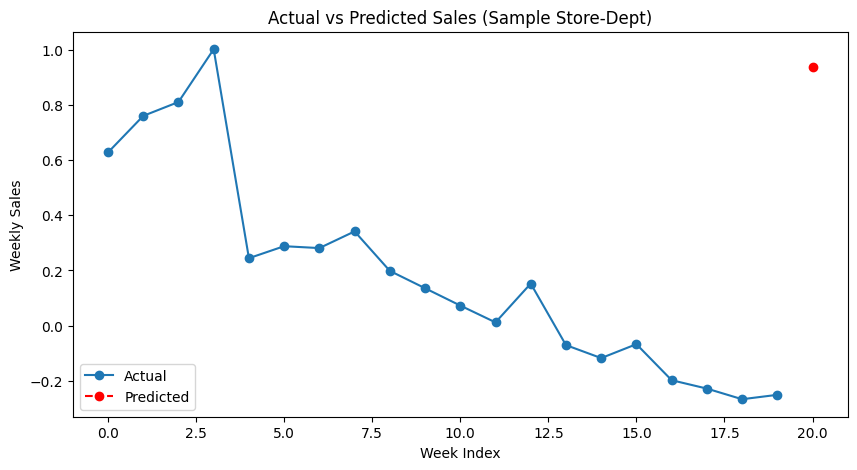

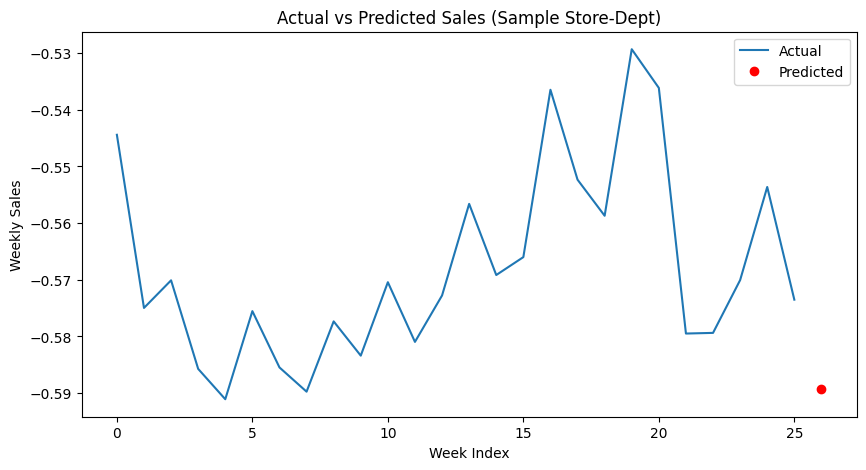

In [40]:
import matplotlib.pyplot as plt
import wandb

wandb.init()

# Load the best model
best_model_path = 'patchtst_model_8mkh8qtj.pth'
best_model_config = {
    'c_in': len(feature_cols),
    'seq_len': 26,
    'pred_len': 1,
    'n_layers': 2,
    'd_model': 32,
    'd_ff': 64,
    'patch_len': 8,
    'stride': 8,
    'n_heads': 8
}

best_model = PatchTST(**best_model_config)
best_model.load_state_dict(torch.load(best_model_path))
best_model.to(device)
best_model.eval()

# Make predictions on the validation set
with torch.no_grad():
    predictions = []
    for batch_X, _ in val_loader:
        batch_X = batch_X.to(device)
        outputs = best_model(batch_X).cpu().numpy()
        predictions.extend(outputs)

# Plot a sample from the validation set
sample_idx = 0
plt.figure(figsize=(10, 5))
plt.plot(X_val[sample_idx, :, 0].numpy(), label='Actual')
plt.plot(len(X_val[sample_idx, :, 0]), predictions[sample_idx], 'ro', label='Predicted')
plt.xlabel('Week Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs Predicted Sales (Sample Store-Dept)')
wandb.log({'sample_prediction_plot': wandb.Image(plt)})
plt.show()